![Images](Images/ITAcademy.png)
# CIÈNCIA DE DADES: M06.T01
#### Created by: Dani Planas Montserrat


In [31]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import statistics
#Import library MySql
import mysql.connector

#Import Library Preprocessing and modeling
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Import Library
from ip2geotools.databases.noncommercial import DbIpCity


warnings.filterwarnings('ignore')


In [32]:
#************************************************************************************
#***************************     READ Files Functions      **************************
#************************************************************************************
#Function for Read *.csv file (Import Data)
def openFileTXT(path_name):
    
    # Read *.csv file (Import Data)
    df = pd.read_csv(path_name, sep='::', names=movie_column_l, encoding = 'ISO-8859-1', index_col=0, engine='python')

    return df

#Function for Read *.txt file (Import Data)
def openFileTable(path_name, file_name, separator, movie_column_l):

    # Read *.txt file (Import Data)
    df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    
    return df

#Function for Read *.parquet file (Import Data)
def openFileParquet(path_name, file_name):
    
    #Import library pyarrow for read files with extenison "parquet" 
    import pyarrow 
    # Read *.txt file (Import Data)
    #df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    df = pd.read_parquet(path_name + file_name, engine='pyarrow')
    
    return df




In [33]:
#************************************************************************************
#******************************      PLOT Functions     *****************************
#************************************************************************************
#Function plot, type Histogram (one categoric value)
def plotHistogram(df):
    
    # create a dataset
    height = df
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['green'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Histogram (one Numeric value)
def plotHistogram2(df,paramNum):
    
    # create a dataset
    height = df[paramNum]
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['yellow'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

def plotDensityPlot(df):
    # library & dataset
    import seaborn as sns
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(df, shade=True, color="r")
    #fig = sns.kdeplot(df[paramNum2], shade=True, color="b")

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type ScatterPlot
def plotSnsScatterplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type LinePlot
def plotSnsLineplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.lineplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type HistPlot
def plotSnsHistplot(df, paramNum1, title, ylabel, xlabel, binsNum):
  
    sns.histplot(data=df, x=paramNum1, bins=binsNum, kde=True)
    #g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Stacked Area Chart (with 3 numeric values and 1 categoric value)   
def plotBarplotMultiple(df, paramNum1, paramNum2, paramNum3, Sel3):
        # libraries
        import numpy as np
        import matplotlib.pyplot as plt

        # width of the bars
        barWidth = 0.3
        
        # Choose the height of the blue bars
        bars1 = df

        if (Sel3 == 2):
            # Choose the height of the cyan bars
            bars2 = df[paramNum2] 

        if (Sel3 == 3):
            # Choose the height of the cyan bars
            bars3 = df[paramNum3] 
        
        # Choose the height of the error bars (bars1)
        yer1 = np.arange(len(bars1))

        # Choose the height of the error bars (bars2)
        yer2 = np.arange(len(bars1))
        
        #print(title) by groups of bars
        title = df.index 
        
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer1, capsize=5, label=paramNum1)
        
        if (Sel3 == 2):
            # Create cyan bars
            plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum2)

        if (Sel3 == 3):
             # Create cyan bars
             plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum3)
   
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], title)
        plt.ylabel('height')
        #plt.legend()

        # Show graphic
        fig = plt.gcf()
        plt.show()

        return fig

#Function plot, show a World Map with Geolocation points from a dataset
def plotWorldMapGeolocPoints(df, pLatitud, pLongitud):

        bars3 = df[pLatitud] 

        #Dibujar mapas
        from mpl_toolkits.basemap.test import Basemap
        import matplotlib.pyplot as plt


        #Figure Size
        plt.figure(figsize=(16,12))

        #Projection Type : robin, ortho ...
        my_map=Basemap(projection='robin',lon_0=0,lat_0=0)  #'robin' ,'ortho'

        #Draw cost lines and countries
        my_map.drawcoastlines()
        my_map.drawcountries()

        #Define colours
        my_map.drawcountries(color='#303338')
        my_map.drawmapboundary(fill_color='#c0eaff')
        my_map.drawcoastlines(color='#324c87')
        my_map.fillcontinents(color='#ebe7d5', lake_color='#c0eaff')


        #Place the different locations on the map
        for i in range(len(df[pLongitud])):     
            x,y = my_map(df[pLongitud][i], df[pLatitud][i])
            my_map.plot(x,y, color='g', marker = 'o' , markersize=10 , alpha = 0.9)

        return my_map
    

In [34]:
#************************************************************************************
#***************************     GEOLOCATION Functions     **************************
#************************************************************************************

/#Function that give us information on the location of an IP adress (Country, latitude, altitude,..)
def getInfoGeolocation(x, num):
    

    
    response = DbIpCity.get(x, api_key='free')
    
    #(1) Return Name of country
    if num==1:
        exit = response.country
    #(2) Return Name of country
    if num==2:
        exit = response.latitude
    #(3) Return Name of country
    if num==3:
        exit = response.longitude
   
    #ip = str(dfLogWeb['IP'][1])
    #response = DbIpCity.get(ip, api_key='free')
    #response.ip_address
    #print(response.city)
    #print(response.region)
    #print(response.country)

    #print(response.latitude)
    #print(response.longitude)
    #print(response.to_json())
    return exit



In [35]:
#************************************************************************************
#***************************        SAMPLE Functions       **************************
#************************************************************************************
#Function for doing a Simple Random Sampling from a dataset
def simpleSampling(df, num_sample):
    
    dfSample = df.sample(num_sample)          # Select X sample points from dataset
    return dfSample                           # Return result

# Function for doing a Systematic Sampling from dataset
def systematicSampling(df, start, step):
 
    indexes = np.arange(start, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Function for doing a Stratified Sampling from dataset (able for 3 subgroups)
def stratifiedSampling3Group(df, group, subgName1, subgName2, subgName3, samplePercentage):
 
    # STEP1: Divide de Group in subgroups (STRATA)
    group1_df = df.groupby(group)
    group1_df = group1_df.get_group(subgName1)
    nReg_group1 = len(group1_df)
#   print('Regsitros Grupo 1:', nReg_group1)
#   display(group1_df)

    group2_df = df.groupby(group)
    group2_df = group2_df.get_group(subgName2)
    nReg_group2 = len(group2_df)
#   print('Regsitros Grupo 2:', nReg_group2)
#   display(group2_df)

    group3_df = df.groupby(group)
    group3_df = group3_df.get_group(subgName3)
    nReg_group3 = len(group3_df)
#   print('Regsitros Grupo 3:', nReg_group3)
#   display(group3_df)
    
    # STEP 2: get a percentage from each group
    group11_df = group1_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group12_df = group2_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group13_df = group3_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))

    # STEP 3: 
    dfNew = pd.concat([group11_df, group12_df])
    dfNew = pd.concat([dfNew, group13_df])

    return dfNew

# Function for doing a Systematic Sampling from dataset
def reservoirSampling(df, k):
          
    #Import library
    import random
    
    # Create as stream generator
    #stream = dfRunners20['athlete']
    stream = df.index
    # Doing Reservoir Sampling from the stream
    #k=6
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element

    print(reservoir)
    print(len(reservoir))

    #Define new dataframe
    df_Sample = pd.DataFrame()

    #Create a New dataframe with values selected from reservoir sampling
    for i in range(len(reservoir)):
        num = reservoir[i]
        df_Sample = df_Sample.append(df.loc[num],ignore_index=True)
        
    return df_Sample

In [36]:
#************************************************************************************
#********************       LINEAR REGRESSION Functions          ********************
#************************************************************************************

In [37]:
##########################################################################
##                 DATA SCIENCE: M06.T01: Exercici 1                    ##
##########################################################################
# Exercici 1: Crea almenys dos models de regressió diferents per intentar 
# predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

path_name = "Data sets\\M05\\"                                        # Define Path name
file_name = "housing data.csv"                                        # Define File name
separator = ','                                                       # Define type of char between columns  
movie_column_l = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE',
                  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 
                  'MEDV']                                             # Define name of columns

df = openFileTable(path_name, file_name, separator, movie_column_l)   # Function to open File


print ("Taula de viendes de Houston: ")                               # Print Message
display(df)                                                           # Display datset imported

print ("Leyenda:")

print ("    1. CRIM:      per capita crime rate by town")
print ("    2. ZN:        proportion of residential land zoned for lots over 25,000 sq.ft.")
print ("    3. INDUS:     proportion of non-retail business acres per town")
print ("    4. CHAS:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)")
print ("    5. NOX:       nitric oxides concentration (parts per 10 million)")
print ("    6. RM:        average number of rooms per dwelling")
print ("    7. AGE:       proportion of owner-occupied units built prior to 1940")
print ("    8. DIS:       weighted distances to five Boston employment centres")
print ("    9. RAD:       index of accessibility to radial highways")
print ("    10. TAX:      full-value property-tax rate per $10,000")
print ("    11. PTRATIO:  pupil-teacher ratio by town")
print ("    12. B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
print ("    13. LSTAT:    % lower status of the population")
print ("    14. MEDV:     Median value of owner-occupied homes in $1000's")


Taula de viendes de Houston: 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Leyenda:
    1. CRIM:      per capita crime rate by town
    2. ZN:        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS:     proportion of non-retail business acres per town
    4. CHAS:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX:       nitric oxides concentration (parts per 10 million)
    6. RM:        average number of rooms per dwelling
    7. AGE:       proportion of owner-occupied units built prior to 1940
    8. DIS:       weighted distances to five Boston employment centres
    9. RAD:       index of accessibility to radial highways
    10. TAX:      full-value property-tax rate per $10,000
    11. PTRATIO:  pupil-teacher ratio by town
    12. B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT:    % lower status of the population
    14. MEDV:     Median value of owner-occupied homes in $1000's


In [38]:
# Show the information from the Table Values
display(df.describe())

#Show the correlation between all values
corr_matrix=df.corr()
display(corr_matrix)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [39]:
#************************************************************************************
#***************************     Correlation Functions     **************************
#************************************************************************************
#Function for convert a correlation matrix in "tidy" format
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

# Call Function for select what value has more correlation with "MEDV" value
tidy_corr_matrix(corr_matrix).head(30)

,var_1,var_2,r,abs_r
121,RAD,TAX,0.910228,0.910228
134,TAX,RAD,0.910228,0.910228
102,DIS,NOX,-0.769230,0.769230
63,NOX,DIS,-0.769230,0.769230
58,NOX,INDUS,0.763651,0.763651
32,INDUS,NOX,0.763651,0.763651
104,DIS,AGE,-0.747881,0.747881
91,AGE,DIS,-0.747881,0.747881
181,LSTAT,MEDV,-0.737663,0.737663
194,MEDV,LSTAT,-0.737663,0.737663


<span style=color:green><b>REGRESIÓN LINEAL SIMPLE(SLR) EN "STATSMODELS": Selecció valors</u></b></span> 

Hem calculat les correlacions entre columnes i hem decidit agafar la columna "RM" (Número d'habitacions), per realitzar el nostre model, ja que és el valor que presenta una correlació més elevada (0.695) i POSITIVA (les dos aumente o disminueixen a la vegada).

El segon valor que presenta més correlació és "LSTAT" (-0.737663) i l'utilitzarem per ajustar el model amb més d'una variable. el valor "LSTAT" és el percentatge de menor status de la població.

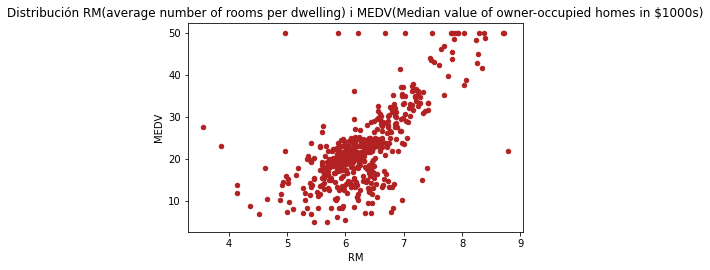

In [40]:
#Show a graphic for see the relationship between values
datos = pd.DataFrame({'RM': df['RM'], 'MEDV': df['MEDV']})
fig, ax = plt.subplots(figsize=(6, 3.84))

#
datos.plot(
    x    = 'RM',
    y    = 'MEDV',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución RM(average number of rooms per dwelling) i MEDV(Median value of owner-occupied homes in $1000s)');

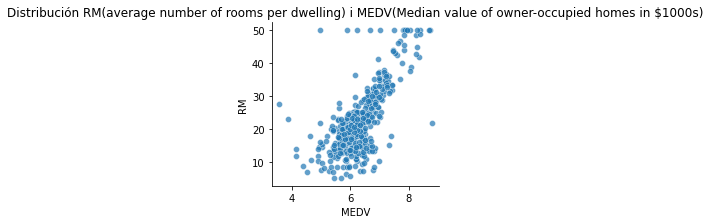

In [41]:

#Show a graphic for see the relationship between values
ylabel = 'RM'
xlabel = 'MEDV'
title ='Distribución RM(average number of rooms per dwelling) i MEDV(Median value of owner-occupied homes in $1000s)'
fig = plotSnsScatterplot(df, 'RM', 'MEDV', title, ylabel, xlabel)



In [42]:
#(1) Regresión Lineal Simple (SLR) with "Statsmodels"

def model_StatsModel_1Ref(df1, col_ref1 , col_target, text):
    ## Without a constant
    import statsmodels.api as sm

    X = df1[col_ref1]
    y = df1[col_target]

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model
    
    #Print Predictions
    print(text)
    display(predictions)
    
    # Print out the statistics
    display(model.summary())

    # Optional: Print the values from R2
    print("Valor R2 (RSquare/Adjusted R Square):")
    print(model.rsquared, model.rsquared_adj)
    print("-------------------------------------")

    # Optional: Print the values from MSE
    from sklearn.metrics import mean_squared_error
    print("Valor MSE (Mean Square Error):")
    print(mean_squared_error(y, predictions))

# Call Function print a Status Model with "Statsmodel": Simple Linear Regression
model_StatsModel_1Ref(df, "RM" , "MEDV", "Las prediccions dels preus del habitatges són:")

Las prediccions dels preus del habitatges són:


0      24.020779
1      23.458163
2      26.249323
3      25.566146
4      26.110495
         ...    
501    24.086539
502    22.358504
503    25.485772
504    24.820863
505    22.029703
Length: 506, dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):                   3.74e-256
Time:                        11:40:16   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Valor R2 (RSquare/Adjusted R Square):
0.9013578661721013 0.9011625352140263
-------------------------------------
Valor MSE (Mean Square Error):
58.41063543210172


<span style=color:green><b>REGRESIÓN LINEAL SIMPLE(SLR) EN "STATSMODELS": Análisis Resultats</u></b></span> 

De la taula que hem obtingut podem definir els següents resultats:

OLS:     Mínims cuadrats Ordinaris (Métode Mínims Cuadrats)

Coef.:   3.6534, significa que a mesura que la variable RM aumenta en 1, el valor pevist de MEDV              aumenta 3.6534.
std-err: 0.054, és la desviació típica de la distribució muestral d'una estadística, la mitja)

t yp:    són els valors per la prova d'hipótesis.

El valor "RM" te un valor p estadísticament significatiu, hi han intervals de confiança del 95%. Això significa que farem una predicció amb una confiança del 95% que el valor "RM" estará entre 3,548 y 3,759.

In [43]:
#Function Multiple Linear Regression (MLR) with "Statsmodels"
def model_StatsModel_2Ref(df1, col_ref1 , col_ref2 , col_target, text):
    ## Without a constant
    import statsmodels.api as sm

    X = df1[[col_ref1, col_ref2]]
    y = df1[col_target]

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model
    
    #Print Predictions
    print(text)
    display(predictions)
    
    # Print out the statistics
    display(model.summary())
    
    # Optional: Print the values from R2
    print("Valor R2 (RSquare/Adjusted R Square):")
    print(model.rsquared, model.rsquared_adj)
    print("-------------------------------------")

    # Optional: Print the values from MSE
    from sklearn.metrics import mean_squared_error
    print("Valor MSE (Mean Square Error):")
    print(mean_squared_error(y, predictions))
    

# Call Function print a Status Model with "Statsmodel": Multiple Linear Regression
model_StatsModel_2Ref(df, "RM", "LSTAT", "MEDV", "Las prediccions dels preus del habitatges són:")



Las prediccions dels preus del habitatges són:


0      28.997322
1      25.513780
2      32.613488
3      32.410653
4      31.574564
         ...    
501    26.010226
502    24.076146
503    30.532203
504    29.088325
505    24.421412
Length: 506, dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):                        0.00
Time:                        11:40:17   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Valor R2 (RSquare/Adjusted R Square):
0.9484526812988413 0.9482481284468526
-------------------------------------
Valor MSE (Mean Square Error):
30.523585848303807


<span style=color:green><b>REGRESIÓN LINEAL MULTIPLE(MLR) EN "STATSMODELS": Análisis Resultats</u></b></span> 

De la taula que hem obtingut podem definir els següents resultats:

R-Square:   0,948, té un valor molt més alt que l'anterior model. el que significa que aquest model             explica el 94,8% de la variable en la nostra variable independent.

OLS:        Mínims cuadrats Ordinaris (Métode Mínims Cuadrats)
Coef.RM:    4.9069, significa que a mesura que la variable RM aumenta en 1, el valor pevist de MEDV             aumenta 4.9069.
Coef.LSTAT: -0.6557, significa que a mesura que la variable LSTAT aumenta en 1, el valor pevist de               MEDV disminiurà -0.6557.
std-err:    0.054, és la desviació típica de la distribució muestral d'una estadística, la mitja)
t yp:    són els valors per la prova d'hipótesis.

El valor "RM" te un valor p estadísticament significatiu, hi han intervals de confiança del 95%. Això significa que farem una predicció amb una confiança del 95% que el valor "RM" estará entre 3,548 y 3,759.

In [44]:
##########################################################################
##                 DATA SCIENCE: M06.T01: Exercici 2                    ##
##########################################################################
# Exercici 2: Compara’ls en base al MSE i al R2.





<span style=color:green><b>COMPARACIÓ MODELS</u></b></span> 

En els dos Models analitzats el l'apartat anterior, hem obtingut els següents valors:</p>

<span style=color:green><b>MODEL 1</u></b></span> :</p>
       R-Square:   0.901 , té un valor molt de 91%.</p>
       MSE:        58.410635 ,  </p>
</p>
</p>
<span style=color:green><b>MODEL 2</u></b></span> :</p>
       R-Square:   0.9484 , té un valor molt de 94%.</p>
       MSE:        30.5235 ,  </p>
       
Amb aquest resultat podem veure que el MODEL 2 té un R2 superior en un 3% , això ens indica que el MODEL 1 té un millor ajust entre la predicció i el valor real.</p>
</p>L'error cuadrátic (MSE) ens indica quan es desvien les prediccions dels valors reals. Per tant, el MODEL 2 és millor ja que té un valor inferior (30.52) al MODEL 2(58.41).

In [45]:
##########################################################################
##                 DATA SCIENCE: M06.T01: Exercici 3                    ##
##########################################################################
# Exercici 3: Entrena’ls utilitzant els diferents paràmetres que admeten 
# per intentar millorar-ne la predicció..

##########################################################################
##                 DATA SCIENCE: M06.T01: Exercici 4                    ##
##########################################################################
# Exercici 4: Compara el seu rendiment emprant l’aproximació traint/test 
# o emprant totes les dades (validació interna).

In [46]:
##########################################################################
##                        REGRESIÓ LINEAL SIMPLE                       ##
##########################################################################

In [47]:
# Function that Split data in train and test:

def split_TrainTest(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    #Split the data into Train and Test
    X = df[[Xparam]]
    y = df[Yparam]


    X_train, X_test, y_train, y_test = train_test_split(
                                            X.values.reshape(-1,1),
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True#,
                                            #test_size=0.33
                                            )

    # Create the Model with Train & Test
    X_train = sm.add_constant(X_train, prepend=True)
    model = sm.OLS(endog=y_train, exog=X_train,)
    model = model.fit()
    print(model.summary())
    return model, X_train, X_test, y_train, y_test 

#Function that Split data in Train and Test, and show
model, X_train, X_test, y_train, y_test  = split_TrainTest(df, 'RM', 'MEDV')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     292.9
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.03e-49
Time:                        11:40:17   Log-Likelihood:                -1347.2
No. Observations:                 404   AIC:                             2698.
Df Residuals:                     402   BIC:                             2706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.3225      3.100     -9.782      0.0

In [48]:
# Confidence intervals for the model coefficients
model.conf_int(alpha=0.05)

array([[-36.41654171, -24.2284056 ],
       [  7.43457347,   9.36432775]])

In [49]:
# Predictions with 95% confidence interval: Show predictions
prediction = model.predict()
display(prediction)

# Predictions with 95% confidence interval: Show predictions and aonfidence intervals
prediction = model.get_prediction(exog = X_train).summary_frame(alpha=0.05)
prediction.head(10)

array([21.4517399 , 31.10270865, 26.36541851, 40.0229252 , 23.46760805,
       23.26602123, 24.9039141 , 17.59639207, 21.35094649, 25.14749817,
       21.03176737, 24.60993333, 13.2370772 , 21.04016682, 30.02757897,
       24.40834651, 11.83436895, 37.45269331, 22.02290254, 20.50260198,
       19.78024923, 30.56514381, 21.47693825, 39.04858893, 21.84651408,
       19.03269812, 19.46946956, 19.91464044, 19.74665143, 23.45080914,
       21.77091902,  8.75177058, 11.36399972, 10.88523103, 19.43587175,
       32.00144986, 25.59266905, 31.22030096, 18.99910032, 24.14796354,
       25.24829157, 19.93143934, 27.39015148, 26.17223114, 23.5768009 ,
       24.83671849, 21.82971518,  6.3663266 , 24.05556959, 20.56979759,
       31.96785206, 23.4760075 , 26.64260038, 28.59127292, 26.63420092,
       25.05510421, 18.70511955, 17.56279427, 21.53573441, 30.77513008,
       19.13349153, 22.1824921 , 23.64399651, 18.73871735, 22.97204046,
       18.81431241, 21.60293001, 17.62159042, 28.81805808, 19.45

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,21.451740,0.343356,20.776742,22.126738,8.049036,34.854444
1,31.102709,0.610553,29.902433,32.302984,17.663307,44.542110
2,26.365419,0.410100,25.559209,27.171628,12.955466,39.775371
3,40.022925,1.083513,37.892866,42.152984,26.468811,53.577039
4,23.467608,0.344352,22.790652,24.144564,10.064805,36.870411
5,23.266021,0.342434,22.592836,23.939207,9.863408,36.668634
6,24.903914,0.368778,24.178940,25.628888,11.498600,38.309228
7,17.596392,0.440309,16.730796,18.461988,4.182738,31.010046
8,21.350946,0.344366,20.673964,22.027929,7.948142,34.753751
9,25.147498,0.374631,24.411018,25.883979,11.741557,38.553440


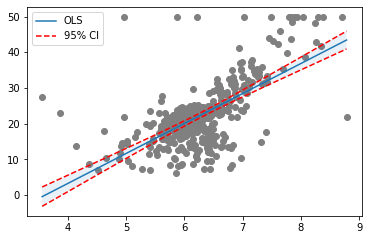

In [50]:
# Predicciones con intervalo de confianza del 95%
prediction = model.get_prediction(exog = X_train).summary_frame(alpha=0.05)
prediction['x'] = X_train[:, 1]
prediction['y'] = y_train
prediction = prediction.sort_values('x')

# Show the Grafic to Model
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(prediction['x'], prediction['y'], marker='o', color = "gray")
ax.plot(prediction['x'], prediction["mean"], linestyle='-', label="OLS")
ax.plot(prediction['x'], prediction["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(prediction['x'], prediction["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(prediction['x'], prediction["mean_ci_lower"], prediction["mean_ci_upper"], alpha=0.1)
ax.legend();

In [51]:
#Test Error
X_test = sm.add_constant(X_test, prepend=True)
prediction = model.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediction,
        squared = False
       )
print("")
print(f"L'error (rmse) de test és: {rmse}")


L'error (rmse) de test és: 5.89913059892488


<span style=color:green><b>REGRESIÓN LINEAL SIMPLE(SLR): Análisis Rendiment amb TRAIN - TEST</u></b></span> 

El valor de R-squared indica que el model és capaç d'explicar el 42.1% de la variabilitat observada en la variable resposta (MEDV). El p-value obtingut en el test F (Prob (F-statistic) = 1.03e-49) indica que sí hi han evidències de que la variança explicada pel model és superior a la esperada per atzar (variança total).

El modelo lineal generat segueix la següent equació:

      MEDV = -30.3225 + 8.3995*RM
 
Per cada unitat que s'incrementa el valor RM(), el número de MEDV aumenta en 8.3995 unitats.

L'error de test del model (RMSE) és de 5.89. Les prediccions del model final s'allunyen en 5.89 unitats del valor real.

In [52]:
##########################################################################
##                       REGRESIÓ LINEAL MULTIPLE                       ##
##########################################################################

In [53]:
# Function that Split data in train and test:

def split_TrainTest_Multiple(df, Xparam1, Xparam2, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    #Split the data into Train and Test
    X = df[[Xparam1, Xparam2]]
    y = df[Yparam]


    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True#,
                                            #test_size=0.33
                                            )

    # Create the Model with Train & Test
    X_train = sm.add_constant(X_train, prepend=True)
    model = sm.OLS(endog=y_train, exog=X_train,)
    model = model.fit()
    print(model.summary())
    return model, X_train, X_test, y_train, y_test 

#Function that Split data in Train and Test, and show
model, X_train, X_test, y_train, y_test  = split_TrainTest_Multiple(df, "RM", "LSTAT", "MEDV")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     303.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           6.25e-81
Time:                        11:40:20   Log-Likelihood:                -1271.7
No. Observations:                 404   AIC:                             2549.
Df Residuals:                     401   BIC:                             2561.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7958      3.610      1.051      0.2

In [54]:
# Confidence intervals for the model coefficients
model.conf_int(alpha=0.05)

,0,1
const,-3.301450,10.892954
RM,3.308752,5.306949
LSTAT,-0.756582,-0.564014


In [55]:
# Predictions with 95% confidence interval: Show predictions
prediction = model.predict()
display(prediction)

# Predictions with 95% confidence interval: Show predictions and aonfidence intervals
prediction = model.get_prediction(exog = X_train).summary_frame(alpha=0.05)
prediction.head(10)

array([16.17935435, 26.42466315, 21.35384416, 37.68181424, 17.972581  ,
       15.6373861 , 28.8315884 , 20.77861666, 12.83277424, 29.35269474,
       20.2426914 , 26.25752078,  7.43663347, 23.9116519 , 31.18865533,
       27.66621427,  2.69600893, 35.77594686, 22.49420392, 17.4753712 ,
       20.36016406, 31.84733049, 22.2207966 , 37.03683803, 25.63919816,
       23.00092915, 18.92639887, 21.86853882, 17.63571178, 23.9000423 ,
       20.92551925,  5.16265303, 15.93144688,  1.97151458, 18.55260667,
       31.48787868, 18.46159629, 27.93102519, 18.94267536, 19.28555167,
       26.40003407, 20.75464831, 29.38698767, 27.4549597 , 25.62200748,
       25.95784515, 25.82867179,  2.38752361, 23.58292468, 24.27788621,
       31.65553066, 24.36857132, 15.98251681, 24.24521374, 27.94280466,
       25.81233314, 18.58060529, 16.23834549, 14.43962887, 30.75988779,
       19.3879707 , 19.86883221, 23.53031145, 21.42391117, 27.84738568,
       23.20586796, 24.173866  , 20.63306874, 30.99751836, 20.35

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
221,16.179354,0.484010,15.227841,17.130868,5.021057,27.337652
375,26.424663,0.614452,25.216713,27.632613,15.241579,37.607747
450,21.353844,0.504182,20.362675,22.345014,10.192095,32.515593
163,37.681814,0.916519,35.880032,39.483596,26.419104,48.944524
402,17.972581,0.497923,16.993715,18.951447,6.811918,29.133244
378,15.637386,0.633304,14.392375,16.882397,4.450239,26.824534
0,28.831588,0.422716,28.000573,29.662604,17.682920,39.980257
315,20.778617,0.435261,19.922938,21.634295,9.628083,31.929150
437,12.832774,0.693551,11.469325,14.196224,1.631827,24.033721
194,29.352695,0.440577,28.486566,30.218824,18.201354,40.504035


In [56]:
#Test Error
X_test = sm.add_constant(X_test, prepend=True)
prediction = model.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediction,
        squared = False
       )
print("")
print(f"L'error (rmse) de test és: {rmse}")


L'error (rmse) de test és: 5.17677280042316


<span style=color:green><b>REGRESIÓN LINEAL SIMPLE(SLR): Análisis Rendiment amb TRAIN - TEST</u></b></span> 

El valor de R-squared indica que el model és capaç d'explicar el 60.2% de la variabilitat observada en la variable resposta MEDV. El p-value obtingut en el test F (Prob (F-statistic) = 1.03e-49) indica que sí hi han evidències de que la variança explicada pel model és superior a la esperada per atzar (variança total).

El modelo lineal generat segueix la següent equació:

      MEDV =  3.7958 + 4.3079*RM - 0.6603*LSTAT
 
L'error de test del model (RMSE) és de 5.17. Les prediccions del model final s'allunyen en 5.17 unitats del valor real.

In [57]:
##########################################################################
##                 DATA SCIENCE: M06.T01: Exercici 5                    ##
##########################################################################
# Exercici 5: No facis servir la variable del nombre d'habitacions (RM) a 
# l’hora de fer prediccions.

In [58]:
# Drop the "RM" Value from group Train and tets
X_train = X_train.drop(columns = 'RM')
X_test  = X_test.drop(columns = 'RM')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
model  = sm.OLS(endog=y_train, exog=X_train,)
model  = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     454.4
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           5.24e-68
Time:                        11:40:23   Log-Likelihood:                -1305.0
No. Observations:                 404   AIC:                             2614.
Df Residuals:                     402   BIC:                             2622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0062      0.624     54.519      0.0